In [ ]:
import pandas as pd

# Creating DataFrame for students
data_students = {
    'name': [],
    'gender': [],
    'age': [],
    'dob': [],
    'e-mail': [],
    'phone': [],
    'password': [],
    'pincode': [],
    'family income': [],
    'aadhar': [],
    'pan number': [],
    'level of education': [],
    'area of interest': [],
    'preferred language': [],
    'attendance': [],
    'assessment score': [],
    'tasks completed': []
}

df_students = pd.DataFrame(data_students)

# Creating DataFrame for mentors
data_mentors = {
    'name': [],
    'age': [],
    'gender': [],
    'education qualification': [],
    'e-mail': [],
    'password': [],
    'aadhar': [],
    'pan number': [],
    'area of expertise': [],
    'languages speak': []
}

df_mentors = pd.DataFrame(data_mentors)

# Creating DataFrame for universities
data_universities = {
    'name': [],
    'rank': [],
    'number of vacancies': []
}

df_universities = pd.DataFrame(data_universities)

# Display the empty DataFrames
print("Students DataFrame:")
print(df_students)
print("\nMentors DataFrame:")
print(df_mentors)
print("\nUniversities DataFrame:")
print(df_universities)


Students DataFrame:
Empty DataFrame
Columns: [name, gender, age, dob, e-mail, phone, password, pincode, family income, aadhar, pan number, level of education, area of interest, preferred language, attendance, assessment score, tasks completed]
Index: []

Mentors DataFrame:
Empty DataFrame
Columns: [name, age, gender, education qualification, e-mail, password, aadhar, pan number, area of expertise, languages speak]
Index: []

Universities DataFrame:
Empty DataFrame
Columns: [name, rank, number of vacancies]
Index: []


In [ ]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import faker
import string

fake = faker.Faker('en_IN')  # Faker with Indian locale

# Helper functions
def generate_email(name):
    return f"{name.replace(' ', '').lower()}@gmail.com"

def generate_password(length=8):
    letters_and_digits = string.ascii_letters + string.digits
    return ''.join(random.choice(letters_and_digits) for i in range(length))

def generate_pan():
    letters = ''.join(random.choices(string.ascii_uppercase, k=5))
    numbers = ''.join(random.choices(string.digits, k=4))
    last_letter = random.choice(string.ascii_uppercase)
    return f"{letters}{numbers}{last_letter}"

def generate_dob(age):
    today = pd.Timestamp.now()
    birth_year = today.year - age
    birth_month = random.randint(1, 12)
    birth_day = random.randint(1, 28)  # Simplified to avoid complexity with different month lengths
    return pd.Timestamp(year=birth_year, month=birth_month, day=birth_day).date()

# Lists of possible values
genders = ['Male', 'Female']
pincodes = [400017, 400016, 400015, 400018, 400019, 400020]
areas_of_interest = ['Law', 'Software Development', 'Mechanical', 'Electrical']
preferred_languages = ['Hindi', 'English', 'Marathi']

# Generating unique data
names = set()
while len(names) < 100:
    names.add(fake.name())
names = list(names)

emails = set()
phones = set()
aadhars = set()
pans = set()

data_students = {
    'name': [],
    'gender': [],
    'age': [],
    'dob': [],
    'e-mail': [],
    'phone': [],
    'password': [],
    'pincode': [],
    'family income': [],
    'aadhar': [],
    'pan number': [],
    'level of education': [],
    'area of interest': [],
    'preferred language': [],
    'attendance': [],
    'assessment score': [],
    'tasks completed': []
}

for name in names:
    gender = random.choice(genders)
    age = random.randint(18, 25)
    dob = generate_dob(age)
    email = generate_email(name)
    while email in emails:
        email = generate_email(name)
    emails.add(email)

    phone = fake.unique.msisdn()[0:10]
    while phone in phones:
        phone = fake.unique.msisdn()[0:10]
    phones.add(phone)

    password = generate_password()

    pincode = random.choice(pincodes)
    family_income = random.randint(50000, 300000)

    aadhar = fake.unique.random_number(digits=12, fix_len=True)
    while aadhar in aadhars:
        aadhar = fake.unique.random_number(digits=12, fix_len=True)
    aadhars.add(aadhar)

    pan = generate_pan()
    while pan in pans:
        pan = generate_pan()
    pans.add(pan)

    level_of_education = random.choice(['High School', 'Undergraduate', 'Postgraduate'])
    area_of_interest = random.choice(areas_of_interest)
    preferred_language = random.choice(preferred_languages)
    attendance = random.randint(10, 100)
    assessment_score = random.randint(0, 95)
    tasks_completed = random.randint(20, 100)

    data_students['name'].append(name)
    data_students['gender'].append(gender)
    data_students['age'].append(age)
    data_students['dob'].append(dob)
    data_students['e-mail'].append(email)
    data_students['phone'].append(phone)
    data_students['password'].append(password)
    data_students['pincode'].append(pincode)
    data_students['family income'].append(family_income)
    data_students['aadhar'].append(aadhar)
    data_students['pan number'].append(pan)
    data_students['level of education'].append(level_of_education)
    data_students['area of interest'].append(area_of_interest)
    data_students['preferred language'].append(preferred_language)
    data_students['attendance'].append(attendance)
    data_students['assessment score'].append(assessment_score)
    data_students['tasks completed'].append(tasks_completed)

df_students_new = pd.DataFrame(data_students)

# Calculate the average assessment score and tasks completed
avg_assessment_score = df_students_new['assessment score'].mean()
avg_tasks_completed = df_students_new['tasks completed'].mean()

# Define the peer_comparison column
def peer_comparison(row):
    if row['assessment score'] > avg_assessment_score and row['tasks completed'] > avg_tasks_completed:
        return 'A'
    elif row['assessment score'] < avg_assessment_score and row['tasks completed'] < avg_tasks_completed:
        return 'C'
    else:
        return 'B'

df_students_new['peer_comparison'] = df_students_new.apply(peer_comparison, axis=1)

# Display the DataFrame with the new column
print("Students DataFrame with Peer Comparison:")


Students DataFrame with Peer Comparison:


In [27]:
df_students_new.sample(1)

,name,gender,age,dob,e-mail,phone,password,pincode,family income,aadhar,pan number,level of education,area of interest,preferred language,attendance,assessment score,tasks completed,peer_comparison
0,Tushar Raman,Female,21,2003-02-13,tusharraman@gmail.com,8002043067,YzaCxwT8,400015,204291,857006631687,EDWSY4269T,High School,Mechanical,Marathi,96,34,62,B


In [ ]:
import pandas as pd
import json
from google.colab import files

# Step 2: Convert the DataFrame to a JSON string
json_str = df_students_new.to_json(orient='records', lines=True)

# Step 3: Save the JSON string to a file
with open('data_students.json', 'w') as file:
    file.write(json_str)

print("JSON file saved successfully.")

# Step 4 (Optional): Download the JSON file to your local machine
files.download('data_students.json')


JSON file saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import pandas as pd
import random
import string
from faker import Faker

fake = Faker('en_IN')

# Helper functions
def generate_random_password(length=8):
    characters = string.ascii_letters + string.digits + string.punctuation
    password = ''.join(random.choice(characters) for i in range(length))
    return password

def generate_random_pan():
    return ''.join(random.choices(string.ascii_uppercase, k=5)) + ''.join(random.choices(string.digits, k=4)) + random.choice(string.ascii_uppercase)

def generate_random_aadhar():
    return ''.join(random.choices(string.digits, k=12))

# List of possible values
education_qualifications = ['BTech Graduate', 'PhD', 'Post Graduate']
areas_of_expertise = ['Law', 'Software Development', 'Mechanical', 'Electrical','Medical']
languages_speak = ['Hindi', 'Marathi', 'English']

# Ensuring 2 mentors per field of expertise
expertise_distribution = [expertise for expertise in areas_of_expertise for _ in range(2)]

# Generate random data
data_mentors = {
    'name': [fake.unique.first_name() + " " + fake.unique.last_name() for _ in range(10)],
    'age': [random.randint(22, 50) for _ in range(10)],
    'gender': [random.choice(['Male', 'Female']) for _ in range(10)],
    'education qualification': [random.choice(education_qualifications) for _ in range(10)],
    'e-mail': [],
    'pincode':[random.choice([400017, 400016, 400015, 400018, 400019, 400020]) for _ in range(10)] ,
    'password': [generate_random_password() for _ in range(10)],
    'aadhar': [generate_random_aadhar() for _ in range(10)],
    'pan number': [generate_random_pan() for _ in range(10)],
    'area of expertise': random.sample(expertise_distribution, 10),
    'prefereble language': [random.choice(languages_speak) for _ in range(10)]
}

# Generate emails
data_mentors['e-mail'] = [name.replace(" ", "").lower() + '@gmail.com' for name in data_mentors['name']]

# Create DataFrame
df_mentors = pd.DataFrame(data_mentors)

In [31]:
df_mentors.head()

,name,age,gender,education qualification,e-mail,pincode,password,aadhar,pan number,area of expertise,prefereble language
0,Hunar Bansal,38,Male,BTech Graduate,hunarbansal@gmail.com,400015,TLz_ctUC,503878807799,LIIDY7420S,Mechanical,Hindi
1,Azad Bhakta,44,Male,PhD,azadbhakta@gmail.com,400016,"V""=OAxcE",073857135175,YJTSZ7451B,Software Development,Marathi
2,Arhaan Dhawan,46,Female,PhD,arhaandhawan@gmail.com,400020,.J<{|RbJ,644067298780,JBPWR9078K,Medical,English
3,Anahita Vyas,42,Male,PhD,anahitavyas@gmail.com,400017,U8+(eg7@,786539347982,MICWP0251U,Electrical,Hindi
4,Kaira De,29,Female,Post Graduate,kairade@gmail.com,400019,"o,/ZaeV2",497034375170,FZCWC6968U,Law,Hindi


In [59]:
import pandas as pd
import json
from google.colab import files

# Step 2: Convert the DataFrame to a JSON string
json_str = df_mentors.to_json(orient='records', lines=True)

# Step 3: Save the JSON string to a file
with open('data_mentors.json', 'w') as file:
    file.write(json_str)

print("JSON file saved successfully.")

# Step 4 (Optional): Download the JSON file to your local machine
files.download('data_mentors.json')


JSON file saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd

# Data for universities
data_universities = {
    'name': ['Bharati Vidyapeeth', 'Central Institute of Fisheries Education', 'D. Y. Patil Education Society','Dnyaneshwar Vidyapeeth Educational trust'],
    'rank': [1, 2, 3,4],
    'number of vacancies': [15, 12, 10,7]
}

# Create DataFrame
df_universities = pd.DataFrame(data_universities)

# Display the DataFrame
df_universities.head()

,name,rank,number of vacancies
0,Bharati Vidyapeeth,1,15
1,Central Institute of Fisheries Education,2,12
2,D. Y. Patil Education Society,3,10
3,Dnyaneshwar Vidyapeeth Educational trust,4,7


In [21]:
import pandas as pd
import json
from google.colab import files

# Step 2: Convert the DataFrame to a JSON string
json_str = df_universities.to_json(orient='records', lines=True)

# Step 3: Save the JSON string to a file
with open('data_uni.json', 'w') as file:
    file.write(json_str)

print("JSON file saved successfully.")

# Step 4 (Optional): Download the JSON file to your local machine
files.download('data_uni.json')


JSON file saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load datasets
students = df_students
mentors = df_mentors
universities = df_universities

# Check for missing values
print(students.isnull().sum())
print(mentors.isnull().sum())
print(universities.isnull().sum())

# Handle missing values if any (e.g., fill with mean/median or drop)
students = students.dropna()
mentors = mentors.dropna()
universities = universities.dropna()


name                  0
gender                0
age                   0
dob                   0
e-mail                0
phone                 0
password              0
pincode               0
family income         0
aadhar                0
pan number            0
level of education    0
area of interest      0
preferred language    0
attendance            0
assessment score      0
tasks completed       0
dtype: int64
name                       0
age                        0
gender                     0
education qualification    0
e-mail                     0
password                   0
aadhar                     0
pan number                 0
area of expertise          0
languages speak            0
dtype: int64
name                   0
rank                   0
number of vacancies    0
dtype: int64


In [ ]:
scaler = MinMaxScaler()

students['normalized_family_income'] = 1 - scaler.fit_transform(students[['family income']])
students['normalized_attendance'] = scaler.fit_transform(students[['attendance']])
students['normalized_tasks_completed'] = scaler.fit_transform(students[['tasks completed']])
students['normalized_assessment_scores'] = scaler.fit_transform(students[['assessment score']])


In [ ]:
# Define weights for each feature
weights = {
    'normalized_family_income': 0.10,
    'normalized_attendance': 0.30,
    'normalized_tasks_completed': 0.20,
    'normalized_assessment_scores': 0.40
}

# Compute composite score
students['composite_score'] = (
    weights['normalized_family_income'] * students['normalized_family_income'] +
    weights['normalized_attendance'] * students['normalized_attendance'] +
    weights['normalized_tasks_completed'] * students['normalized_tasks_completed'] +
    weights['normalized_assessment_scores'] * students['normalized_assessment_scores']
)


In [ ]:
# Rank students based on composite score
students['rank'] = students['composite_score'].rank(ascending=False)
students = students.sort_values(by='rank')


In [ ]:
# Function to assign students to universities based on rank and vacancies
def assign_universities(students, universities):
    university_assignments = []
    university_vacancies = universities.set_index('name')['number of vacancies'].to_dict()

    for index, student in students.iterrows():
        assigned = False
        for university in universities.sort_values(by='rank')['name']:
            if university_vacancies[university] > 0:
                university_assignments.append((student['name'], university))
                university_vacancies[university] -= 1
                assigned = True
                break
        if not assigned:
            university_assignments.append((student['name'], None))  # No available university

    return university_assignments

# Assign universities
assignments = assign_universities(students, universities)
assignments_df = pd.DataFrame(assignments, columns=['student_name', 'university_name'])


In [ ]:
assignments_df.head(50)

,student_name,university_name
0,Indrans Dora,Bharati Vidyapeeth
1,Akarsh Anand,Bharati Vidyapeeth
2,Anika Kurian,Bharati Vidyapeeth
3,Taran Bhasin,Bharati Vidyapeeth
4,Rania Choudhry,Bharati Vidyapeeth
5,Manikya Dey,Bharati Vidyapeeth
6,Hazel Ganesh,Bharati Vidyapeeth
7,Nitya Devi,Bharati Vidyapeeth
8,Pari Chanda,Bharati Vidyapeeth
9,Anya Wadhwa,Bharati Vidyapeeth


In [ ]:
import pandas as pd
university_counts = assignments_df['university_name'].value_counts()

# Print the counts
print(university_counts)


university_name
Bharati Vidyapeeth                          20
Central Institute of Fisheries Education    15
D. Y. Patil Education Society               10
Name: count, dtype: int64


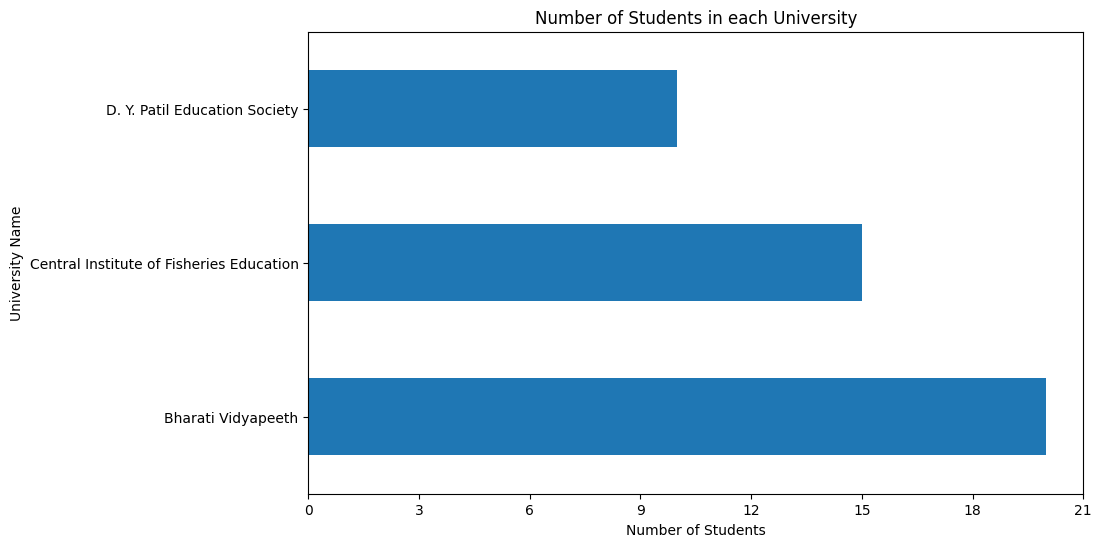

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(10, 6))
ax = university_counts.plot(kind='barh')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of Students')
plt.ylabel('University Name')
plt.title('Number of Students in each University')
plt.show()


In [23]:
df_students_new.head()

,name,gender,age,dob,e-mail,phone,password,pincode,family income,aadhar,pan number,level of education,area of interest,preferred language,attendance,assessment score,tasks completed,peer_comparison
0,Tushar Raman,Female,21,2003-02-13,tusharraman@gmail.com,8002043067,YzaCxwT8,400015,204291,857006631687,EDWSY4269T,High School,Mechanical,Marathi,96,34,62,B
1,Badal Sankar,Male,19,2005-01-20,badalsankar@gmail.com,3197338606,PS5sP2M6,400019,134171,723845365758,SDWVR9626R,High School,Electrical,Hindi,48,45,84,B
2,Aaina Bains,Male,23,2001-12-24,aainabains@gmail.com,9904367955,GS58q4tB,400020,182335,405502052894,KPMDP0089F,Undergraduate,Mechanical,Marathi,79,84,43,B
3,Mannat Magar,Female,19,2005-10-25,mannatmagar@gmail.com,4453997175,1jxFWgTN,400019,268732,352485958463,ODNTC7607H,Undergraduate,Mechanical,Marathi,35,18,73,B
4,Aayush Basu,Female,18,2006-08-05,aayushbasu@gmail.com,4826138398,P4rydtBi,400020,71195,534085625442,SNXPZ3445S,High School,Mechanical,Marathi,88,95,22,B


In [32]:
df_mentors.head()

,name,age,gender,education qualification,e-mail,pincode,password,aadhar,pan number,area of expertise,prefereble language
0,Hunar Bansal,38,Male,BTech Graduate,hunarbansal@gmail.com,400015,TLz_ctUC,503878807799,LIIDY7420S,Mechanical,Hindi
1,Azad Bhakta,44,Male,PhD,azadbhakta@gmail.com,400016,"V""=OAxcE",073857135175,YJTSZ7451B,Software Development,Marathi
2,Arhaan Dhawan,46,Female,PhD,arhaandhawan@gmail.com,400020,.J<{|RbJ,644067298780,JBPWR9078K,Medical,English
3,Anahita Vyas,42,Male,PhD,anahitavyas@gmail.com,400017,U8+(eg7@,786539347982,MICWP0251U,Electrical,Hindi
4,Kaira De,29,Female,Post Graduate,kairade@gmail.com,400019,"o,/ZaeV2",497034375170,FZCWC6968U,Law,Hindi


In [52]:
merged_df = pd.merge(df_students_new, df_mentors, how='inner', left_on=['pincode', 'area of interest'], right_on=['pincode', 'area of expertise'])

student_to_mentors = merged_df.groupby('name_x')['name_y'].apply(list).to_dict()

print(student_to_mentors)


{'Aarush Bail': ['Kaira De'], 'Anya Khurana': ['Ritvik Ramaswamy'], 'Aradhya Kanda': ['Anahita Vyas'], 'Arnav Dhillon': ['Ahana  Saha'], 'Arnav Ranganathan': ['Ritvik Ramaswamy'], 'Badal Saha': ['Kaira De'], 'Dharmajan Chopra': ['Anahita Vyas'], 'Dishani Ratta': ['Anahita Vyas'], 'Divit Konda': ['Anahita Vyas'], 'Elakshi Deshpande': ['Azad Bhakta'], 'Gatik Bhalla': ['Azad Bhakta'], 'Indrans Chowdhury': ['Badal Ranganathan'], 'Kanav Bhavsar': ['Seher Kale'], 'Kiaan Dhillon': ['Anahita Vyas'], 'Kimaya Thaman': ['Seher Kale'], 'Lakshit Agarwal': ['Kaira De'], 'Nayantara Chaudry': ['Kaira De'], 'Nayantara Vasa': ['Anahita Vyas'], 'Parinaaz Deshpande': ['Hunar Bansal'], 'Raghav Sane': ['Badal Ranganathan'], 'Raunak Wagle': ['Anahita Vyas'], 'Saanvi Tailor': ['Anahita Vyas'], 'Sana Sachdev': ['Anahita Vyas'], 'Suhana Chand': ['Azad Bhakta'], 'Taimur Dara': ['Seher Kale'], 'Tarini Chand': ['Ritvik Ramaswamy'], 'Tarini Dhawan': ['Kaira De'], 'Tushar Raman': ['Hunar Bansal'], 'Veer Venkataraman

In [54]:
from collections import defaultdict
import random

# Initialize the mentor assignment dictionary
mentor_assignment = defaultdict(list)

# Keep track of the number of students assigned to each mentor
mentor_count = defaultdict(int)

# List to keep track of students who are not yet assigned
unassigned_students = list(df_students_new['name'])

# Function to assign student to the least loaded eligible mentor
def assign_student(student, eligible_mentors):
    if eligible_mentors:
        # Find the mentor with the minimum count
        min_count = min(mentor_count[mentor] for mentor in eligible_mentors)
        # Filter eligible mentors who have the minimum count
        least_loaded_mentors = [mentor for mentor in eligible_mentors if mentor_count[mentor] == min_count]
        # Randomly choose among the least loaded mentors
        chosen_mentor = random.choice(least_loaded_mentors)
        # Assign the student to the chosen mentor
        mentor_assignment[chosen_mentor].append(student)
        # Increment the count for the chosen mentor
        mentor_count[chosen_mentor] += 1
        # Remove student from unassigned list
        unassigned_students.remove(student)

# Assign students to mentors
for student, mentors in student_to_mentors.items():
    assign_student(student, mentors)

# Handle unassigned students by assigning them to the least loaded mentor
for student in unassigned_students:
    # Find the mentor with the minimum count
    if mentor_count:
        least_loaded_mentor = min(mentor_count, key=mentor_count.get)
        mentor_assignment[least_loaded_mentor].append(student)
        mentor_count[least_loaded_mentor] += 1

# Convert the defaultdict to a regular dictionary for nicer printing
mentor_assignment = dict(mentor_assignment)

# Print the final mentor assignment
for mentor, students in mentor_assignment.items():
    print(f"{mentor}: {students}")


Kaira De: ['Aarush Bail', 'Badal Saha', 'Lakshit Agarwal', 'Nayantara Chaudry', 'Tarini Dhawan', 'Yakshit Manda', 'Yuvaan Dugar', 'Adah Wali', 'Vihaan Bansal', 'Chirag Sodhi', 'Chirag Krishnamurthy', 'Aaina Taneja', 'Nirvaan Kalla']
Ritvik Ramaswamy: ['Anya Khurana', 'Arnav Ranganathan', 'Tarini Chand', 'Aaina Bains', 'Armaan Dave', 'Anay Gulati', 'Heer Dhillon', 'Badal Mani', 'Mehul Chawla', 'Darshit Chander', 'Damini Suri', 'Ivan Doctor', 'Tara Bera']
Anahita Vyas: ['Aradhya Kanda', 'Dharmajan Chopra', 'Dishani Ratta', 'Divit Konda', 'Kiaan Dhillon', 'Nayantara Vasa', 'Raunak Wagle', 'Saanvi Tailor', 'Sana Sachdev', 'Vaibhav Hans', 'Zain Shanker', 'Shamik Sastry', 'Arhaan Kuruvilla']
Ahana  Saha: ['Arnav Dhillon', 'Veer Venkataraman', 'Zain Din', 'Mannat Magar', 'Kiaan Sur', 'Mishti Vohra', 'Shlok Vala', 'Trisha Badami', 'Nakul Manne', 'Aaina Gill', 'Rohan Bhatti', 'Samaira Korpal', 'Eva Desai']
Azad Bhakta: ['Elakshi Deshpande', 'Gatik Bhalla', 'Suhana Chand', 'Yuvraj  Kade', 'Zaina

In [57]:
data = [(mentor, student) for mentor, students in mentor_assignment.items() for student in students]

# Step 2: Create a DataFrame
mapping_df = pd.DataFrame(data, columns=['mentor', 'student'])

# Display the DataFrame
mapping_df.head(20)

,mentor,student
0,Kaira De,Aarush Bail
1,Kaira De,Badal Saha
2,Kaira De,Lakshit Agarwal
3,Kaira De,Nayantara Chaudry
4,Kaira De,Tarini Dhawan
5,Kaira De,Yakshit Manda
6,Kaira De,Yuvaan Dugar
7,Kaira De,Adah Wali
8,Kaira De,Vihaan Bansal
9,Kaira De,Chirag Sodhi


In [60]:
import pandas as pd
import json
from google.colab import files

# Step 2: Convert the DataFrame to a JSON string
json_str = mapping_df.to_json(orient='records', lines=True)

# Step 3: Save the JSON string to a file
with open('mapping_data.json', 'w') as file:
    file.write(json_str)

print("JSON file saved successfully.")

# Step 4 (Optional): Download the JSON file to your local machine
files.download('mapping_data.json')


JSON file saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import pandas as pd
import random
satisfactionOptions = [
    'Very Satisfied',
    'Satisfied',
    'Neutral',
    'Dissatisfied',
    'Very Dissatisfied'
]

contentOptions = [
    'Excellent',
    'Good',
    'Average',
    'Poor',
    'Very Poor'
]

materialsOptions = [
    'Very Useful',
    'Useful',
    'Neutral',
    'Not Useful',
    'Very Not Useful'
]

pacingOptions = [
    'Too Fast',
    'Just Right',
    'Too Slow'
]

effectivenessOptions = [
    'Very Effective',
    'Effective',
    'Neutral',
    'Ineffective',
    'Very Ineffective'
]

organizationOptions = [
    'Very Well Organized',
    'Well Organized',
    'Neutral',
    'Poorly Organized',
    'Very Poorly Organized'
]

data = {
    'Satisfaction': [random.choice(satisfactionOptions) for _ in range(10)],
    'Content': [random.choice(contentOptions) for _ in range(10)],
    'Materials': [random.choice(materialsOptions) for _ in range(10)],
    'Pacing': [random.choice(pacingOptions) for _ in range(10)],
    'Effectiveness': [random.choice(effectivenessOptions) for _ in range(10)],
    'Organization': [random.choice(organizationOptions) for _ in range(10)]
}

feedback_df = pd.DataFrame(data)

feedback_df.head(10)


,Satisfaction,Content,Materials,Pacing,Effectiveness,Organization
0,Neutral,Average,Not Useful,Too Fast,Ineffective,Poorly Organized
1,Dissatisfied,Very Poor,Useful,Too Slow,Very Effective,Well Organized
2,Very Satisfied,Average,Very Not Useful,Too Fast,Very Ineffective,Very Poorly Organized
3,Neutral,Good,Neutral,Too Fast,Effective,Very Well Organized
4,Satisfied,Very Poor,Not Useful,Just Right,Very Ineffective,Poorly Organized
5,Neutral,Average,Neutral,Just Right,Ineffective,Very Poorly Organized
6,Neutral,Excellent,Neutral,Too Fast,Ineffective,Very Well Organized
7,Dissatisfied,Average,Not Useful,Too Slow,Ineffective,Very Well Organized
8,Very Satisfied,Excellent,Useful,Too Slow,Effective,Very Well Organized
9,Neutral,Very Poor,Very Not Useful,Too Slow,Neutral,Very Poorly Organized


In [66]:
import pandas as pd
import json
from google.colab import files

# Step 2: Convert the DataFrame to a JSON string
json_str = feedback_df.to_json(orient='records', lines=True)

# Step 3: Save the JSON string to a file
with open('feedback_data.json', 'w') as file:
    file.write(json_str)

print("JSON file saved successfully.")

# Step 4 (Optional): Download the JSON file to your local machine
files.download('feedback_data.json')


JSON file saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>